# Intro to ML - Binary classification model for a mobile carrier

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Intro-to-ML---Binary-classification-model-for-a-mobile-carrier" data-toc-modified-id="Intro-to-ML---Binary-classification-model-for-a-mobile-carrier-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Intro to ML - Binary classification model for a mobile carrier</a></span></li><li><span><a href="#Project-description" data-toc-modified-id="Project-description-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Project description</a></span></li><li><span><a href="#Data-description" data-toc-modified-id="Data-description-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data description</a></span></li><li><span><a href="#Library-imports" data-toc-modified-id="Library-imports-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Library imports</a></span></li><li><span><a href="#CSV-file-read" data-toc-modified-id="CSV-file-read-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>CSV file read</a></span></li><li><span><a href="#General-info-and-preprocessing" data-toc-modified-id="General-info-and-preprocessing-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>General info and preprocessing</a></span></li><li><span><a href="#Split-source-data-into-training-set,-validation-set-and-test-set" data-toc-modified-id="Split-source-data-into-training-set,-validation-set-and-test-set-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Split source data into training set, validation set and test set</a></span></li><li><span><a href="#Investigate-different-model-quality-by-changing-hyperparameters" data-toc-modified-id="Investigate-different-model-quality-by-changing-hyperparameters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Investigate different model quality by changing hyperparameters</a></span><ul class="toc-item"><li><span><a href="#Decision-Tree-Classifier" data-toc-modified-id="Decision-Tree-Classifier-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Decision Tree Classifier</a></span></li><li><span><a href="#Random-Forest-Classifier" data-toc-modified-id="Random-Forest-Classifier-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Random Forest Classifier</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Logistic Regression</a></span></li></ul></li><li><span><a href="#Model-quality-check-using-test-set" data-toc-modified-id="Model-quality-check-using-test-set-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Model quality check using test set</a></span></li><li><span><a href="#Model-sanity-check" data-toc-modified-id="Model-sanity-check-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Model sanity check</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Project description

Mobile carrier Megaline found that many of their subscribers use legacy plans. 

They want to develop a model to analyze subscribers' behavior and recommend one of Megaline's newer plans: Smart or Ultra.

We have access to behavior data about subscribers who already switched to the new plans. 

For this classification task, we need to develop a model to pick the right plan with the highest possible accuracy.

# Data description

Every observation in the dataset contains average monthly behavior info about one user.

The info given is as follows:
- `сalls` — number of calls,
- `minutes` — total call duration in minutes,
- `messages` — number of text messages,
- `mb_used` — internet traffic used in MB,
- `is_ultra` — plan for the current month (Ultra - 1, Smart - 0).

# Library imports

In [1]:
#Libraries and project environment setup:

##Pandas, Numpy and Datetime for data preprocessing and manipulation
import pandas as pd
import numpy as np
import datetime
from datetime import datetime

##Remove warnings
import sys
import warnings
if not sys.warnoptions:
   warnings.simplefilter("ignore");

##Scipy, Math and Random for SDA
from scipy import stats as st
from scipy.stats import loguniform
import math as mth
import random

##Matplotlib, Seaborn, Plotly, Altair and Streamlit for visualization
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import rcParams
from matplotlib.pyplot import figure
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.graph_objects as go
from plotly import tools
import plotly.offline as py
import altair as alt
import streamlit as sl
from IPython.display import Image

#USAddress for handling USA addresses in DF
import usaddress

#SKLearn and JobLib for ML
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler as ss
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import joblib
from joblib import dump

# CSV file read

In [2]:
#We use try-except to handle unexpected errors
try:
    df=pd.read_csv('/Downloads/users_behavior.csv.csv')

except:
    df=pd.read_csv('https://code.s3.yandex.net/datasets/users_behavior.csv')

# General info and preprocessing

In [3]:
#First, in order to guarantee efficiency we immediately drop row-based duplicates
df.drop_duplicates(inplace=True,keep='last')
df.reset_index(drop=True, inplace=True)

#Print the first five entries in the dataframe
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


No visible NaN values.

In [4]:
#General file examination (missing values and data types)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


- Results show column names are accurate to the project data description.
- Dataset includes 3214 entries and 5 columns.
- There aren't any missing values.
- Data types are fine.
- `is_ultra` is the binary target variable and the other 4 are numerical features.

In [5]:
#Integrated display of the columns
df.describe(include='all')

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


- `calls`, `minutes`, `mb_used`, `is_ultra` seem normally distributed with close mean and median values.
- At 25%, `messages` has a low value (9), indicating a positively skewed distribution.

All seems in order, let's move on..

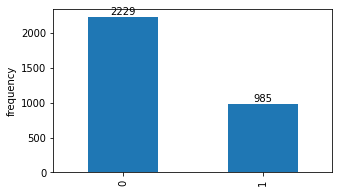

In [6]:
#EDA- target
ax=df['is_ultra'].value_counts().plot(kind='bar',figsize=(5,3),ylabel='frequency')
ax.bar_label(ax.containers[0]);

Plot shows there are more "Smart" observations than "Ultra" by over twice the amount.

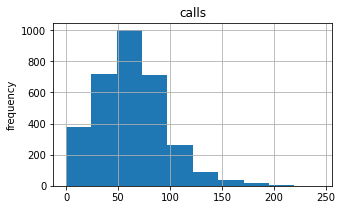

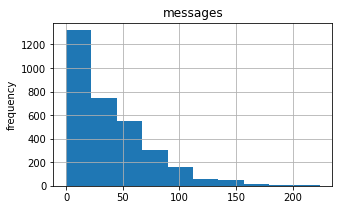

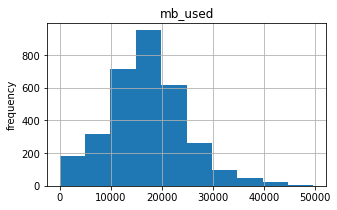

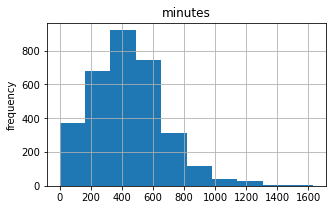

In [7]:
#EDA- features
for feature in ['calls','messages','mb_used','minutes']:
    df.hist(feature,figsize=(5,3))
    plt.ylabel('frequency');

Plots above depict an insignificant number of outliers with distributions as suspected earlier.

# Split source data into training set, validation set and test set

In [8]:
#Splitting data into train and test sets (X- features, y-target)
X = df.drop('is_ultra', axis=1)
y = df['is_ultra']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=12345)

Stratify parameter splits such that produced sample values' proportion is the same as provided values' proportion.

For example, if y is binary categorical with 25% of zeros and 75% of ones, stratify=y will make random splits into 25% of 0's and 75% of 1's.

In [9]:
#Splitting train set into train and validation
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.25, random_state=12345)

In [10]:
#Naming sets
X_test.name = 'X_test'
X_valid.name = 'X_valid'
y_train.name = 'y_train'
y_valid.name = 'y_valid'
y_test.name = 'y_test'
X_train.name = 'X_train'

In [11]:
#Checking set size
for set in [X_train, y_train, X_valid, y_valid, X_test, y_test]:
    print("Size of", set.name, ":", set.shape)

Size of X_train : (1928, 4)
Size of y_train : (1928,)
Size of X_valid : (643, 4)
Size of y_valid : (643,)
Size of X_test : (643, 4)
Size of y_test : (643,)


Source data successfully split into sets.

In [12]:
#Standard Scaling
sc = ss()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)
X_test = sc.transform(X_test)

StandardScaler transforms data so distribution has mean value 0 and std 1.

# Investigate different model quality by changing hyperparameters

## Decision Tree Classifier

In [13]:
#Checking default accuracy
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_valid)

acc_dtc_d = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_dtc_d

69.52

In [14]:
#Running loop to find best max_depth
d = []
for depth in range(1,11):
    dtc = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_valid)
    acc_dtc = round(accuracy_score(y_valid,y_pred) * 100, 2)
    d.append({'max_depth': depth, 'acc_dtc': acc_dtc})

best_param = pd.DataFrame(d).nlargest(1, ['acc_dtc'], keep='first')
best_param

,max_depth,acc_dtc
5,6,80.4


max_depth=6 has the highest accuracy score of 80.4

In [15]:
#Checking tuned accuracy
dtc = DecisionTreeClassifier(random_state=12345, max_depth=6)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_valid)

acc_dtc = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_dtc

80.4

## Random Forest Classifier

In [16]:
#Checking default accuracy
rfc = RandomForestClassifier(random_state=12345)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_valid)

acc_rfc_d = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_rfc_d

78.69

In [17]:
#Running loop to find best n_estimators
d = []
for estim in range(1,51,9):
    for depth in range(1,11):
        rfc = RandomForestClassifier(random_state=12345, n_estimators=estim, max_depth=depth)
        rfc.fit(X_train, y_train)
        y_pred = rfc.predict(X_valid)
        acc_rfc = round(accuracy_score(y_valid,y_pred) * 100, 2)
        d.append({'n_estimators':estim, 'max_depth':depth, 'acc_rfc':acc_rfc})

best_param = pd.DataFrame(d).nlargest(1, ['acc_rfc'], keep='first')
best_param

,n_estimators,max_depth,acc_rfc
16,10,7,80.09


max_depth=7 and n_estimators=10 has the highest accuracy score of 80.09

In [18]:
#Checking tuned accuracy
rfc = RandomForestClassifier(random_state=12345, n_estimators = 10, max_depth = 7)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_valid)

acc_rfc = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_rfc

80.09

## Logistic Regression

In [19]:
#Checking default accuracy
lr = LogisticRegression()
lr.fit(X_train, y_train)     
y_pred = lr.predict(X_valid)

acc_lr_d = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_lr_d

74.49

In [20]:
#Running loop to find best hyperparameters
d = []
for solver in ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']:
    for C in [x / 100.0 for x in range(1, 1000)]:
        lr = LogisticRegression(random_state=12345, solver=solver, C=C)
        lr.fit(X_train, y_train)
        y_pred = lr.predict(X_valid)
        acc_lr = round(accuracy_score(y_valid,y_pred) * 100, 2)
        d.append({'solver':solver, 'C':C, 'acc_lr':acc_lr})

best_param = pd.DataFrame(d).nlargest(1, ['acc_lr'], keep='first')
best_param

,solver,C,acc_lr
1998,liblinear,0.01,75.12


solver=liblinear and C=0.01 has the highest accuracy score of 75.12

In [21]:
#Checking tuned accuracy
lr = LogisticRegression(random_state=12345, solver="liblinear", C=0.01)
lr.fit(X_train, y_train)     
y_pred = lr.predict(X_valid)

acc_lr = round(accuracy_score(y_valid,y_pred)*100,2)
acc_lr

75.12

Logistic Regression is used to validate assumptions and decisions when creating feature and completing goals. It's done by calculating the correlation coefficient of the features in the decision function.

Positive coefficients increase odds of response, thus increasing probability. Negative coefficients decrease the odds of response, thus decreasing probability.

In [22]:
#Calculating correlation
df_coeff = pd.DataFrame()
df_coeff['feature'] = ['calls','minutes','messages','mb_used']
df_coeff["correlation"] = pd.Series(lr.coef_[0])

df_coeff.sort_values(by='correlation', ascending=False)

,feature,correlation
2,messages,0.292926
3,mb_used,0.216632
0,calls,0.178899
1,minutes,0.143173


All 4 coefficients are positive, implying positive correlation between features and target.

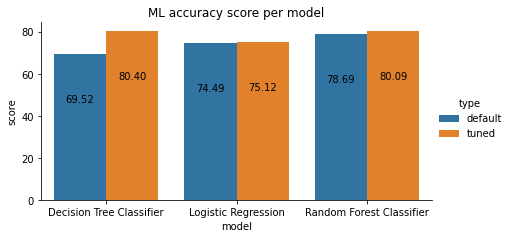

In [23]:
#Creating DF of default and tuned model scores
models = pd.DataFrame({
    'model': ['Decision Tree Classifier','Random Forest Classifier','Logistic Regression'],
    'default': [acc_dtc_d, acc_rfc_d, acc_lr_d],
    'tuned': [acc_dtc, acc_rfc, acc_lr]})

models= pd.melt(models, id_vars="model", var_name="type", value_name="score").sort_values(by='model')

#Plotting
g=sns.factorplot(y='score', x='model', data=models, kind='bar', hue='type',size=3, aspect=2)
plt.title('ML accuracy score per model')

for ax in g.axes.ravel():
      for p in ax.patches:
            ax.annotate(format(p.get_height(),'.2f'),
            (p.get_x()+p.get_width()/2., p.get_height()), ha='center',
            va='bottom', xytext = (0,-50), textcoords = 'offset points');

DecisionTreeClassifier is the best model, now we'll check quality.

# Model quality check using test set

In [24]:
#Retraining best tuned model on training set
X = df.drop('is_ultra', axis=1)
y = df['is_ultra']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=12345)

#Testing on test set
rfc = DecisionTreeClassifier(max_depth=6, random_state=12345)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

acc_rfc = round(accuracy_score(y_test,y_pred) * 100, 2)
acc_rfc

79.94

# Model sanity check

In [25]:
#Dummy classification to check baseline
dummy= DummyClassifier(random_state=12345)
dummy.fit(X_train, y_train)
dummy_score = dummy.score(X_test, y_test)

print(round(dummy_score * 100, 2))

69.36


The model needs to have an accuracy higher than the baseline 69.36.

The final accuracy of DesicionTreeClassifier model is higher by 10.58 (79.94) than the baseline accuracy (DummyClassifier).

# Conclusion

In summary, in this project we developed a binary classification model to analyze subscribers' behavior and recommend one of Megaline's newer plans: Smart or Ultra.

In this project, we followed the methodology as follows:
- Open data file and study general information.
- Data preprocessing.
- Split source data into sets.
- Tune hyperparameters.
- Investigate model quality by accuracy score.
- Find best model.
- Testing with test set.
- Model sanity check using DummyClassifier.
- And now, final conclusion.

Findings:
- Outliers number was not significant, therefore we kept data as is.
- Most features' distribution (except for `messages`) were close to normal with a slight deviation. We then performed standard scaling before modeling.
- Target classes were imbalanced. There were over twice as many observations for "Smart" than for "Ultra".

Results of tunning 3 learning algorithms using training set indicated that DecisionTreeClassifier model has the highest accuracy score of 80.4%. Further the model was retrained on the entire training set including validation set. Afterwards model was tested using the test set and reached 79.94% accuracy. 

Finally, model sanity check successfully resulted in the test score being 10.58% higher than the baseline accuracy.

In conclusion of this classification task, we indeed developed a model to pick the right plan with the highest possible accuracy.